Niall Carbery 
22380966

### Find the time evolution of the system: plot the probabilities of the states |0a⟩, |1a⟩, |0b⟩ and |1b⟩ as functions of time?

In [124]:
from scipy.linalg import expm, logm
#import scipy.constants as const
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt

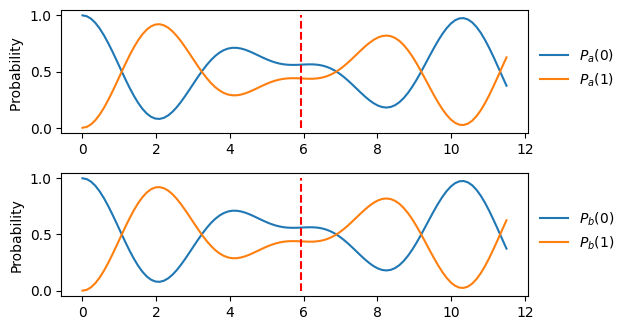

In [125]:
#Evolution of 4 basis states for 2 interdependent systems
n1 = 2
n2 = 2

reduced_density_matrix_a = lambda rho_tensor: np.trace(rho_tensor, axis1=1, axis2=3) #rho_a
reduced_density_matrix_b = lambda rho_tensor: np.trace(rho_tensor, axis1=0, axis2=2) #rho_b

#Let's define some useful matrices
hadamard = (1/np.sqrt(2))*np.array([[1, 1],[1, -1]])
identity = np.array([[1, 0],[0, 1]])

#Let's take the following two Hamiltonians for two independent qubits
hamiltonian_a   = np.array([[0, -1j*0.75],[1j*0.75, 0]])
hamiltonian_b   = np.array([[0, -1j*0.75],[1j*0.75, 0]])
hamiltonian_int = np.array([[0.2, 0, 0, 0 ], [0, -0.35, 0, 0 ], [0, 0, -0.35, 0 ], [0, 0, 0, 0.2 ]])

eig_values_a, eig_vectors_a = np.linalg.eig(hamiltonian_a)
eig_values_b, eig_vectors_b = np.linalg.eig(hamiltonian_b)
#Now form the kronecker product
hamiltonian_total_indep = np.kron(hamiltonian_a, identity) + np.kron(identity, hamiltonian_b) + hamiltonian_int

#What are the initial states for each system? arr = arr[..., None]
initial_state_a = np.matmul(identity, np.array([[1],[0]]))
initial_state_b = np.matmul(identity, np.array([[1],[0]]))

#Initial state in combined system
initial_state_total = np.kron(initial_state_a, initial_state_b)

#Define the evolution operator function with hbar = 1
def evolutionOperator(hamiltonian, time):
  return expm(-1j*hamiltonian*time)

#Probability of measuring each state
projector_00 = np.array([[1,0,0,0]])
projector_01 = np.array([[0,1,0,0]])
projector_10 = np.array([[0,0,1,0]])
projector_11 = np.array([[0,0,0,1]])
prob_measure_0_a = lambda state: np.abs(np.matmul(projector_00, state)[0][0])**2 + np.abs(np.matmul(projector_01, state)[0][0])**2
prob_measure_1_a = lambda state: np.abs(np.matmul(projector_10, state)[0][0])**2 + np.abs(np.matmul(projector_11, state)[0][0])**2
prob_measure_0_b = lambda state: np.abs(np.matmul(projector_00, state)[0][0])**2 + np.abs(np.matmul(projector_10, state)[0][0])**2
prob_measure_1_b = lambda state: np.abs(np.matmul(projector_01, state)[0][0])**2 + np.abs(np.matmul(projector_11, state)[0][0])**2

#Von Neumann Entropy
von_neumann_entropy = lambda density_matrix: (-1)*np.trace(np.matmul(density_matrix,logm(density_matrix)))

#Create figure
fig_indep       = plt.figure()
ax_indep_a      = fig_indep.add_subplot(311)
ax_indep_b      = fig_indep.add_subplot(312, sharex=ax_indep_a)
time = np.linspace(0,11.5,100)

prob_0_a = []
prob_1_a = []
prob_0_b = []
prob_1_b = []

prob_00 = []
prob_01 = []
prob_10 = []
prob_11 = []
entanglement_entropy = []

relative_entropy = []

for current_time in time:
  current_state = np.matmul(evolutionOperator(hamiltonian_total_indep, current_time), initial_state_total)
  density_matrix = np.matmul(current_state, np.transpose(np.conjugate(current_state)))
  density_matrix = np.matmul(current_state, np.transpose(np.conjugate(current_state)))
  rho_tensor=density_matrix.reshape([n1, n2, n1, n2])
  entanglement_entropy.append(von_neumann_entropy(reduced_density_matrix_a(rho_tensor)))
  relative_entropy.append(von_neumann_entropy(reduced_density_matrix_a(rho_tensor)) + von_neumann_entropy(reduced_density_matrix_b(rho_tensor)) - von_neumann_entropy(density_matrix))
  prob_0_a.append(prob_measure_0_a(current_state))
  prob_1_a.append(prob_measure_1_a(current_state))
  prob_0_b.append(prob_measure_0_b(current_state))
  prob_1_b.append(prob_measure_1_b(current_state))
  prob_00.append(np.abs(np.matmul(projector_00, current_state)[0][0])**2)
  prob_01.append(np.abs(np.matmul(projector_01, current_state)[0][0])**2)
  prob_10.append(np.abs(np.matmul(projector_10, current_state)[0][0])**2)
  prob_11.append(np.abs(np.matmul(projector_11, current_state)[0][0])**2)

#(QMI) Relative Entropy = S(rho_a) + S(rho_b) - S(rho_ab)

ax_indep_a.plot(time, prob_0_a, label=r"$P_{a}(0)$")
ax_indep_a.plot(time, prob_1_a, label=r"$P_{a}(1)$")
ax_indep_b.plot(time, prob_0_b, label=r"$P_{b}(0)$")
ax_indep_b.plot(time, prob_1_b, label=r"$P_{b}(1)$")

ax_indep_a.legend()
ax_indep_b.legend()

max_y = max(np.array(relative_entropy))  
max_x = time[np.array(relative_entropy).argmax()]
#max_y = 1.38629  # Find the maximum y value
#max_x = 3.55  # Find the x value corresponding to the maximum y value
max_state = np.matmul(evolutionOperator(hamiltonian_total_indep, max_x), initial_state_total)

ax_indep_a.set_ylabel(r"Probability ")
ax_indep_b.set_ylabel(r"Probability")


ax_indep_a.vlines(x=max_x, ymin=0, ymax=1.0, ls="--", color="r")
ax_indep_b.vlines(x=max_x, ymin=0, ymax=1.0, ls="--", color="r")

ax_indep_a.legend(fontsize=10, frameon=False, bbox_to_anchor=(1,0.8))
ax_indep_b.legend(fontsize=10, frameon=False, bbox_to_anchor=(1,0.8))

plt.tight_layout()

fig_indep.patch.set_alpha(0.0)
ax_indep_a.patch.set_alpha(1.0)
ax_indep_b.patch.set_alpha(1.0)

plt.show()

### <b>Plot the entanglement entropy and quantum mutual information of qubit a and qubit b as functions of time. What is the relationship between the two entropies?</b>

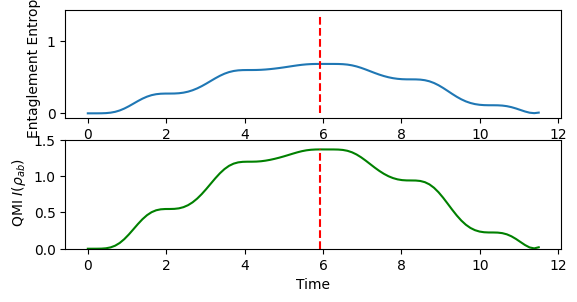

In [126]:
fig_indep       = plt.figure()
ax_indep_a      = fig_indep.add_subplot(311, sharex=ax_indep_a)
ax_indep_b      = fig_indep.add_subplot(312, sharex=ax_indep_a)

ax_indep_a.plot(time, entanglement_entropy)

ax_indep_b.plot(time, relative_entropy, color="g")
ax_indep_b.set_ylim([0,1.5])

ax_indep_a.set_xlabel(r"Time")#
ax_indep_a.set_ylabel(r"Entaglement Entropy")
ax_indep_b.set_xlabel(r"Time")#
ax_indep_b.set_ylabel(r" QMI $I(\rho_{ab})$")
ax_indep_a.vlines(x=max_x, ymin=0, ymax=max_y, ls="--", color="r")
ax_indep_b.vlines(x=max_x, ymin=0, ymax=max_y, ls="--", color="r")
ax_indep_a.patch.set_alpha(1.0)
ax_indep_b.patch.set_alpha(1.0)

#plt.tight_layout()
plt.show()

Both Entropies reach a maximum after the same amount of time as well as following a roughly similar shape and same period.

### <b>Using this system, we would like to build a quantum gate that prepares a Bell state for these two qubits. What is the time of evolution we should allow for this system to achieve a maximally entangled state?</b>

In [127]:
print(max_x)

5.924242424242424


A time evolution of 5.924 is needed, because this has a maximum point of QMI of 2ln(2) = 1.38629 which is the equivalent QMI of a bell state. 

### <b>What is the state vector of the system at the time instance from the previous question? Is it exactly a Bell state? If not, what should be done to transform it to a Bell state?</b>

In [128]:
max_state = np.matmul(evolutionOperator(hamiltonian_total_indep, max_x), initial_state_total)
print("max_state \n " + str(max_state))

input_state = np.array([[1/np.sqrt(2)],[0],[0],[-1/np.sqrt(2)]])

fidelity = np.abs(np.conj(np.transpose(max_state))@input_state)**2
print('Fidelity:',fidelity)

max_state 
 [[-0.21453464-0.69295248j]
 [ 0.16894969+0.0804313j ]
 [ 0.16894969+0.0804313j ]
 [ 0.59097207-0.23348956j]]
Fidelity: [[0.42997362]]


It is not exactly a Bell state, visually or by comparing it with using fidelities. If we apply the S gate to the second qubit and then compute the fidelity against the |Φ−⟩ state we will find we have prepared a maximally entangled Bell state with a fidelity of almost 1, compared to the fidelity of 0.429.

### <b>What is the density matrix of the system at the time instance from the previous question</b>

In [129]:
input_density = input_state@np.conj(np.transpose(input_state))

# Rotate to find a Bell state
#max_state_rotate = np.kron(np.array([[1,0],[0,1j]]),np.array([[1,0],[0,1j]]))@max_state
max_state_rotate = np.kron(identity,np.array([[1,0],[0,1j]]))@max_state
max_density = max_state@np.conj(np.transpose(max_state))
print(max_density)



#Given we are working with pure states here I define the fidelity in terms of state vectors
fidelity = np.abs(np.conj(np.transpose(max_state_rotate))@input_state)**2

print('Fidelity:',fidelity)

#Confirming the relative entropy is maximised for the Bell state
rho_tensor=input_density.reshape([n1, n2, n1, n2])
von_neumann_entropy(reduced_density_matrix_a(rho_tensor)) + von_neumann_entropy(reduced_density_matrix_b(rho_tensor)) - von_neumann_entropy(input_density)

[[ 0.52620826+0.00000000e+00j -0.09198063-9.98188085e-02j
  -0.09198063-9.98188085e-02j  0.03501319-4.59607162e-01j]
 [-0.09198063+9.98188085e-02j  0.03501319+0.00000000e+00j
   0.03501319-1.04083409e-17j  0.08106468+8.69806384e-02j]
 [-0.09198063+9.98188085e-02j  0.03501319+1.04083409e-17j
   0.03501319+0.00000000e+00j  0.08106468+8.69806384e-02j]
 [ 0.03501319+4.59607162e-01j  0.08106468-8.69806384e-02j
   0.08106468-8.69806384e-02j  0.40376536+0.00000000e+00j]]
Fidelity: [[0.92459397]]


1.3862943611198908

We achieve a fidelity of 0.924 compared to our |Φ−⟩ Bell State, with more rotations a better fidelity achieved however the I $\otimes$ S rotation has the largest effect with a fidelity change from 0.43 to 0.92